In [84]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import utils

In [86]:
movies_df = pd.read_csv("data/IMDb movies.csv")

### Task description (in russian)

В ходе выполнения данного задания выбирается набор данных, который будет использоваться в дальнейшем при исследовании алгоритмов кластеризации и классификации. 
Любая задача анализа данных предполагает предобработку и статистический анализ данных, это позволяет в дальнейшем выбрать подходящую модель и алгоритм анализа данных.

#### Задание состоит из последовательного выполнения следующих подзадач.

##### 1. Выбор исследуемого датасета. 

Возможные дата сеты хорошо представлены тут
    1.	 https://github.com/awesomedata/awesome-public-datasets
    2.	Интересные дата сеты http://www.vacommunity.org/About+the+VAST+Challenge
    3.	SWAT 
        1.	https://itrust.sutd.edu.sg/testbeds/secure-water-treatment-swat/#:~:text=SWaT%20consists%20of%20a%20modern,Reverse%20Osmosis%20(RO)%20system.
        2.	https://mlad.kaspersky.com/swat-testbed/  (у меня есть доступ, мне самой 
 
Рекомендация к выбору датасета: предпочтительнее числовые данные, с разметкой.

##### 2. Для каждого датасета представить краткое его описание: 

1.	предметная область, источник данных, характер данных (реальные или имитационные)
2.	какие атрибуты представлены в дата сете, их тип (числовой, строковый (категории)), что они обозначают 
3.	есть ли описание задачи анализа, если есть - представить

##### 3. Для каждого атрибута нужно необходимо определить 

1.	среднее значение, ско
2.	построить гистограмму распределения значений, определить есть ли выбросы 
3.	есть ли пропущенные значение, сколько
4.	предложить вариант обработки пропущенных значений

##### 4. Определить корреляцию между параметрами

1.	какие атрибуты высококоррелированы, определить характер корреляции 
2.	какие атрибуты не имеют корреляцию
3.	постройте графики рассеивания (предпочтительнее матрицу графиков рассеивания)
4.	постройте граф на параллельных координатах
5.	Проаназируйте полученные результаты.

Отчет должен включать описания выполнения каждой подзадачи.


# How to

In [17]:
# Количество пропущенных значений (если столбец какой-то странный)

from collections import Counter

genre_values = (
    movies_df["genre"]
        # Применить какую-нибудь функцию к элементам массива
        .apply(lambda i: i.split(", "))
)
 
print(Counter(genre for genres in genre_values for genre in genres))

Counter({'Drama': 47110, 'Comedy': 29368, 'Romance': 14128, 'Action': 12948, 'Thriller': 11388, 'Crime': 11067, 'Horror': 9557, 'Adventure': 7590, 'Mystery': 5225, 'Family': 3962, 'Fantasy': 3812, 'Sci-Fi': 3608, 'Biography': 2377, 'History': 2296, 'War': 2242, 'Animation': 2141, 'Musical': 2041, 'Music': 1689, 'Western': 1583, 'Sport': 1064, 'Film-Noir': 663, 'Reality-TV': 3, 'Adult': 2, 'Documentary': 2, 'News': 1})


In [23]:
# Количество пропущенных значений если столбец норм

{k: v for k, v in movies_df["country"].value_counts().items()}

{'USA': 28511,
 'India': 6065,
 'UK': 4111,
 'Japan': 3077,
 'France': 3055,
 'Italy': 2444,
 'Canada': 1802,
 'Germany': 1396,
 'Turkey': 1351,
 'Hong Kong': 1239,
 'Spain': 1225,
 'South Korea': 1103,
 'Russia': 802,
 'Australia': 785,
 'Soviet Union': 766,
 'Brazil': 736,
 'UK, USA': 683,
 'Mexico': 655,
 'Iran': 642,
 'Sweden': 622,
 'Poland': 614,
 'Denmark': 563,
 'Greece': 554,
 'China': 524,
 'Netherlands': 495,
 'Italy, France': 489,
 'Finland': 448,
 'France, Italy': 434,
 'West Germany': 421,
 'Egypt': 417,
 'USA, Canada': 396,
 'Hungary': 380,
 'Argentina': 379,
 'France, Belgium': 352,
 'Norway': 351,
 'Canada, USA': 346,
 'USA, UK': 277,
 'Yugoslavia': 272,
 'Thailand': 262,
 'Romania': 258,
 'Philippines': 257,
 'Czechoslovakia': 253,
 'Indonesia': 232,
 'Taiwan': 210,
 'Belgium': 204,
 'Czech Republic': 183,
 'USA, Germany': 161,
 'Israel': 160,
 'Portugal': 152,
 'Italy, Spain': 148,
 'USA, Mexico': 138,
 'South Africa': 137,
 'Germany, USA': 133,
 'France, USA': 132,


/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry

KeyError: 'norm_budget'

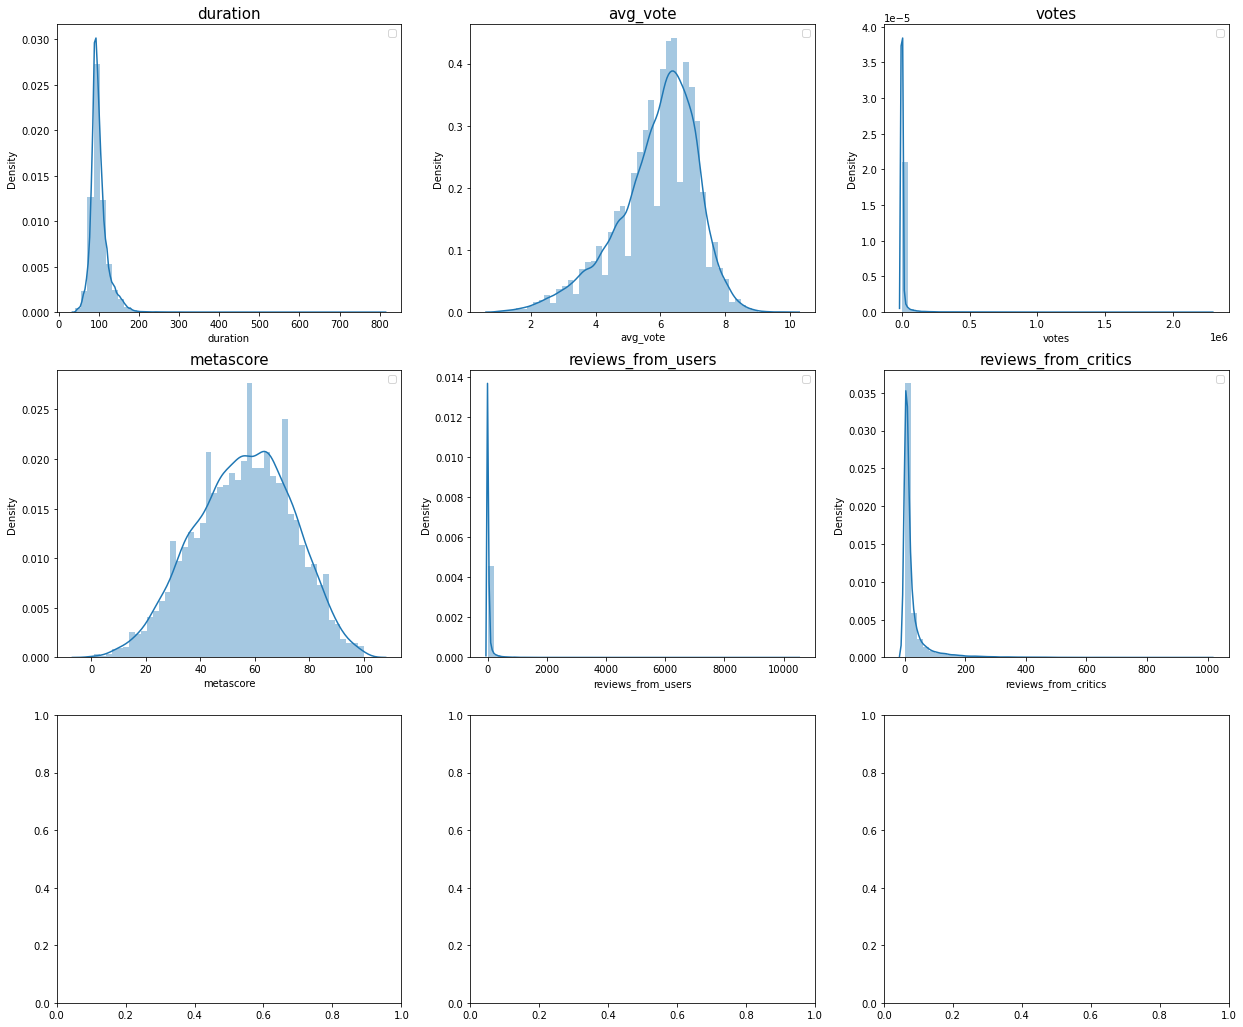

In [87]:
# Построить кучу гистограмм

numerical_data = [
    "duration", "avg_vote", "votes", "metascore", "reviews_from_users", "reviews_from_critics", 
    "norm_budget", "norm_usa_gross_income", "norm_worldwide_gross_income"
]

movies_df["norm_budget"] = movies_df.budget.apply(utils.convert_money_to_usd)
movies_df["norm_usa_gross_income"] = movies_df.usa_gross_income.apply(utils.convert_money_to_usd)
movies_df["norm_worldwide_gross_income"] = movies_df.worlwide_gross_income.apply(utils.convert_money_to_usd)

utils.plot_distplot_matrix(movies_df, numerical_data)

In [31]:
# Проверить выброс
# Сюда можно вставлять разной степени всратости запросы, чтобы получить какую-то информацию о данных
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

movies_df[(movies_df["metascore"] < 60) & (movies_df["metascore"] > 50)]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,norm_budget,norm_usa_gross_income,norm_worldwide_gross_income
1789,tt0025037,La morte in vacanza,Death Takes a Holiday,1934,1934-03-30,"Drama, Fantasy, Romance",79,USA,"English, French",Mitchell Leisen,...,1631,NaN,NaN,NaN,53.0,39.0,15.0,NaN,NaN,NaN
3715,tt0033110,Musica indiavolata,Strike Up the Band,1940,1940-09-27,"Comedy, Musical, Romance",120,USA,English,Busby Berkeley,...,1402,$ 838661,NaN,NaN,59.0,28.0,18.0,838661.0,NaN,NaN
5083,tt0038026,Rapsodia in blu,Rhapsody in Blue,1945,1951-10-25,"Biography, Drama, Musical",135,USA,English,Irving Rapper,...,1200,NaN,NaN,NaN,55.0,41.0,13.0,NaN,NaN,NaN
5374,tt0038969,I racconti dello zio Tom,Song of the South,1946,1950-03-23,"Animation, Comedy, Family",94,USA,English,"Harve Foster, Wilfred Jackson",...,11103,NaN,$ 37459346,$ 37459346,54.0,266.0,39.0,NaN,37459346.0,37459346.0
5964,tt0040745,Amore sotto coperta,Romance on the High Seas,1948,1948-07-03,"Comedy, Musical, Romance",99,USA,"English, Spanish, Portuguese","Michael Curtiz, Busby Berkeley",...,1868,NaN,NaN,NaN,58.0,37.0,17.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85396,tt9354842,P.S. Ti amo ancora,To All the Boys: P.S. I Still Love You,2020,2020-02-12,"Comedy, Drama, Romance",101,USA,English,Michael Fimognari,...,21400,NaN,NaN,NaN,54.0,142.0,52.0,NaN,NaN,NaN
85428,tt9386648,Tammy's Always Dying,Tammy's Always Dying,2019,2020-05-01,Drama,85,Canada,English,Amy Jo Johnson,...,179,NaN,NaN,NaN,55.0,19.0,13.0,NaN,NaN,NaN
85440,tt9398640,Between Two Ferns: Il film,Between Two Ferns: The Movie,2019,2019-09-20,Comedy,82,USA,English,Scott Aukerman,...,24886,NaN,NaN,NaN,59.0,198.0,57.0,NaN,NaN,NaN
85472,tt9441638,The Big Ugly,The Big Ugly,2020,2020-07-24,Drama,106,USA,English,Scott Wiper,...,528,NaN,$ 514107,$ 515399,52.0,45.0,37.0,NaN,514107.0,515399.0


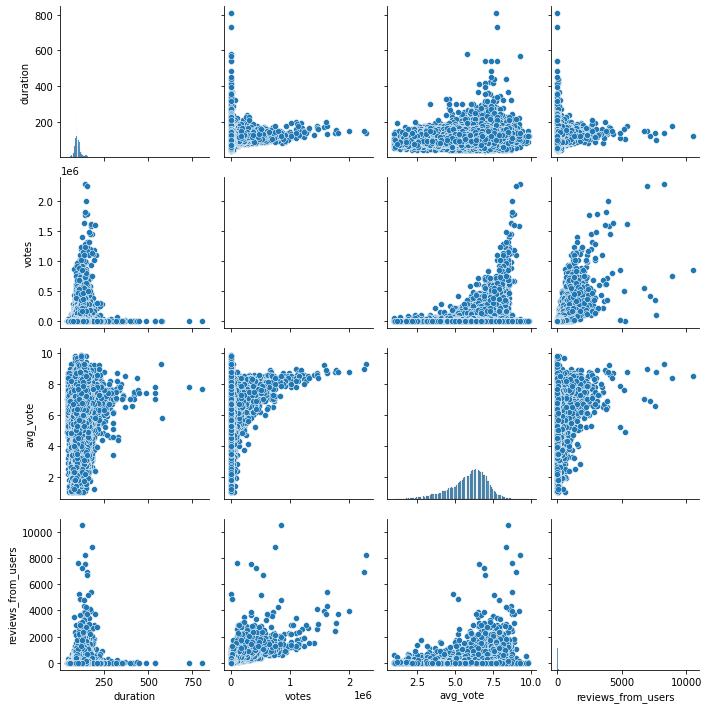

In [34]:
# Матрица графиков рассеивания
normal_length_movies = (movies_df["duration"]) > 50 & (movies_df["duration"] < 120)
has_more_than_100_votes = movies_df["votes"] > 100

sns.pairplot(movies_df[normal_length_movies & has_more_than_100_votes][["duration", "votes", "avg_vote", "reviews_from_users"]])

In [43]:
# Parallel plot -- somehow
pd.plotting.parallel_coordinates(movies_df, "country", ["avg_vote", "metascore", "norm_budget",])

<AxesSubplot:>

ValueError: Image size of 1225x73654 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

### Movies dataframe analysis

In [3]:
movies_df.head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [83]:
movies_df.describe().transpose().drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
duration,1.003514e+02,2.255385e+01,41.0,88.00,96.0,108.0,8.080000e+02
avg_vote,5.898656e+00,1.234987e+00,1.0,5.20,6.1,6.8,9.900000e+00
votes,9.493490e+03,5.357436e+04,99.0,205.00,484.0,1766.5,2.278845e+06
metascore,5.589688e+01,1.778487e+01,1.0,43.00,57.0,69.0,1.000000e+02
reviews_from_users,4.604083e+01,1.785114e+02,1.0,4.00,9.0,27.0,1.047200e+04
reviews_from_critics,2.747999e+01,5.833916e+01,1.0,3.00,8.0,23.0,9.990000e+02
norm_budget,1.161425e+07,5.641334e+07,0.0,570000.00,2300000.0,10000000.0,7.672236e+09
norm_usa_gross_income,1.949154e+07,4.824386e+07,30.0,93311.50,1309583.0,17120444.0,9.366622e+08
norm_worldwide_gross_income,2.249180e+07,8.873551e+07,1.0,115313.25,1113086.0,8273941.0,2.797801e+09


/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-HxUrdvxH-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/Library/Caches/pypoetry

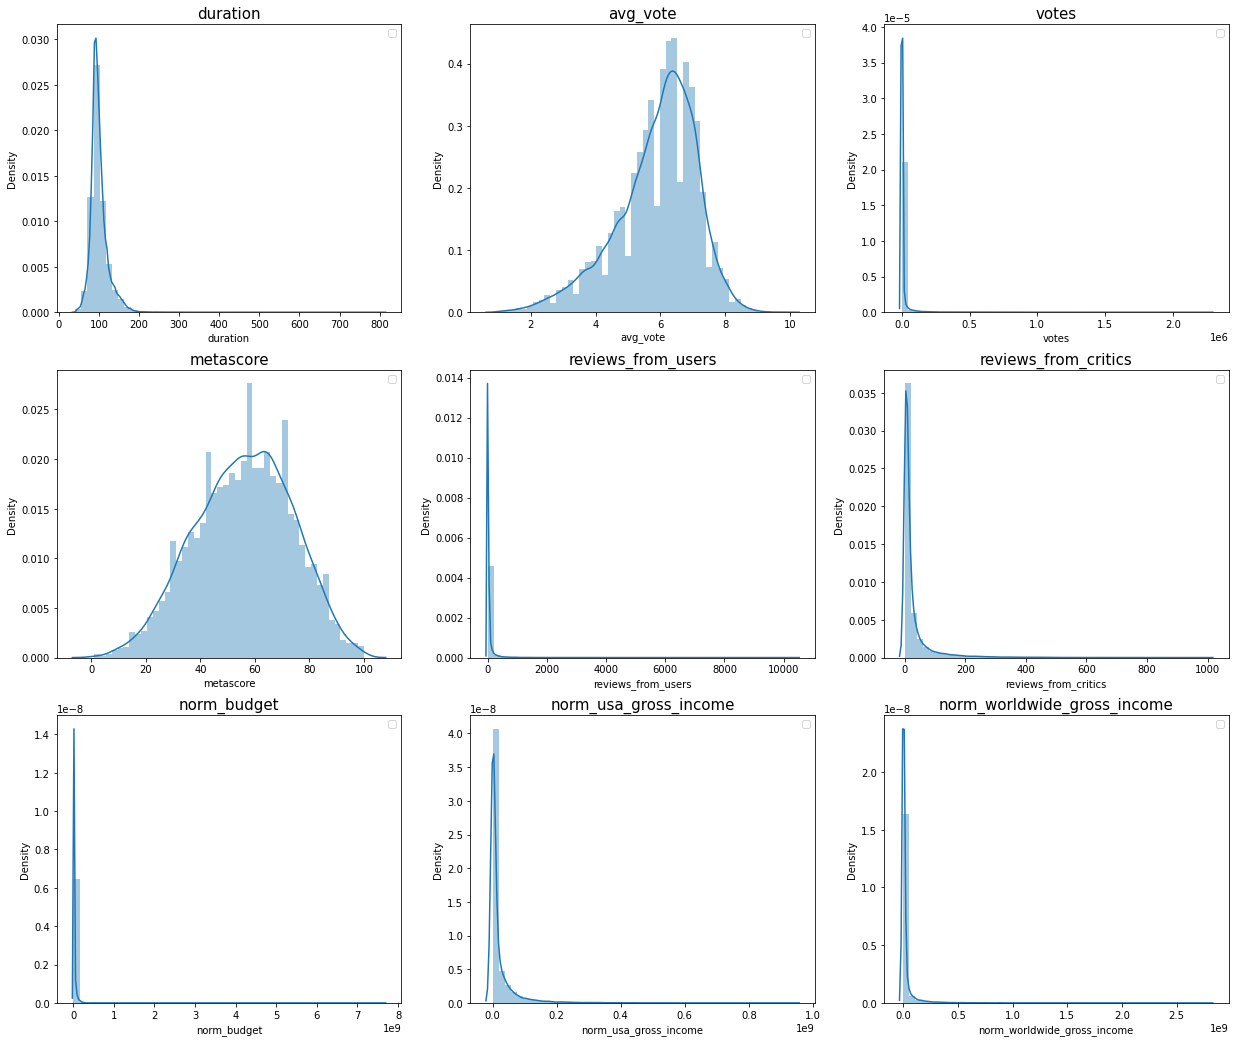

In [88]:
numerical_data = [
    "duration", "avg_vote", "votes", "metascore", "reviews_from_users", "reviews_from_critics", 
    "norm_budget", "norm_usa_gross_income", "norm_worldwide_gross_income"
]

movies_df["norm_budget"] = movies_df.budget.apply(utils.convert_money_to_usd)
movies_df["norm_usa_gross_income"] = movies_df.usa_gross_income.apply(utils.convert_money_to_usd)
movies_df["norm_worldwide_gross_income"] = movies_df.worlwide_gross_income.apply(utils.convert_money_to_usd)
utils.plot_distplot_matrix(movies_df, numerical_data)

In [89]:
utils.get_stats_df(movies_df)

,mean,std,min,25%,50%,75%,max
duration,1.003514e+02,2.255385e+01,41.0,88.00,96.0,108.0,8.080000e+02
avg_vote,5.898656e+00,1.234987e+00,1.0,5.20,6.1,6.8,9.900000e+00
votes,9.493490e+03,5.357436e+04,99.0,205.00,484.0,1766.5,2.278845e+06
metascore,5.589688e+01,1.778487e+01,1.0,43.00,57.0,69.0,1.000000e+02
reviews_from_users,4.604083e+01,1.785114e+02,1.0,4.00,9.0,27.0,1.047200e+04
reviews_from_critics,2.747999e+01,5.833916e+01,1.0,3.00,8.0,23.0,9.990000e+02
norm_budget,1.161425e+07,5.641334e+07,0.0,570000.00,2300000.0,10000000.0,7.672236e+09
norm_usa_gross_income,1.949154e+07,4.824386e+07,30.0,93311.50,1309583.0,17120444.0,9.366622e+08
norm_worldwide_gross_income,2.249180e+07,8.873551e+07,1.0,115313.25,1113086.0,8273941.0,2.797801e+09
